In [1]:
import json
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins
import missingno as mnso

import warnings
warnings.filterwarnings('ignore')

geo_path = 'data/seoul_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='utf-8'))

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = 'Malgun Gothic'

In [4]:
accident = pd.read_csv('data/자전거사고다발지역정보.csv', encoding = 'CP949')
accident.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [5]:
accident.shape

(2718, 15)

In [6]:
accident_seoul = accident.loc[accident['시도시군구명'].str.contains('서울특별시')]
accident_seoul.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,다발지역폴리곤
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,"{""type"":""Polygon"",""coordinates"":[[[126.9871445..."
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,"{""type"":""Polygon"",""coordinates"":[[[126.9826705..."
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,"{""type"":""Polygon"",""coordinates"":[[[127.0168437..."
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,"{""type"":""Polygon"",""coordinates"":[[[127.017036,..."
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,"{""type"":""Polygon"",""coordinates"":[[[126.9633901..."


In [7]:
accident_seoul.shape

(1018, 15)

In [8]:
accident_seoul.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1018 entries, 0 to 2513
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   사고다발지FID  1018 non-null   object 
 1   사고다발지ID   1018 non-null   int64  
 2   법정동코드     1018 non-null   int64  
 3   지점코드      1018 non-null   int64  
 4   시도시군구명    1018 non-null   object 
 5   지점명       1018 non-null   object 
 6   발생건수      1018 non-null   int64  
 7   사상자수      1018 non-null   int64  
 8   사망자수      1018 non-null   int64  
 9   중상자수      1018 non-null   int64  
 10  경상자수      1018 non-null   int64  
 11  부상신고자수    1018 non-null   int64  
 12  경도        1018 non-null   float64
 13  위도        1018 non-null   float64
 14  다발지역폴리곤   1018 non-null   object 
dtypes: float64(2), int64(9), object(4)
memory usage: 127.2+ KB


In [9]:
accident_seoul=accident_seoul.dropna(subset=['위도'])
accident_seoul=accident_seoul.dropna(subset=['경도'])
accident_seoul.shape

(1018, 15)

In [10]:
accident_map = folium.Map(location=[accident_seoul['위도'].mean(), accident_seoul['경도'].mean()], zoom_start=10.8, tiles='CartoDB positron')
for i, row in accident_seoul.iterrows():
    folium.CircleMarker(
        location=[row['위도'], row['경도']],
        radius=1,
        fill=True,
    ).add_to(accident_map)
accident_map

In [11]:
accident_seoul['지역구']=accident['지점명'].str.split(" ").str[1]
accident_seoul=accident_seoul.drop(['다발지역폴리곤'], axis='columns')
accident_seoul.head()

,사고다발지FID,사고다발지ID,법정동코드,지점코드,시도시군구명,지점명,발생건수,사상자수,사망자수,중상자수,경상자수,부상신고자수,경도,위도,지역구
0,"161,307",2013099,1111013400,11110001,서울특별시 종로구1,서울특별시 종로구 경운동(안국역 부근),4,4,0,0,3,1,126.985544,37.576533,종로구
1,"153,927",2013099,1111012300,11110002,서울특별시 종로구2,서울특별시 종로구 서린동(SK빌딩 부근),4,4,0,1,2,1,126.981070,37.570279,종로구
2,"153,929",2013099,1111017500,11110003,서울특별시 종로구3,서울특별시 종로구 숭인동(동묘앞역_일반국도6호선_진출 부근),5,5,0,2,2,1,127.015243,37.572994,종로구
3,"139,637",2013099,1114016300,11140001,서울특별시 중구1,서울특별시 중구 흥인동(다산교(남단) 부근),4,4,0,1,2,1,127.015435,37.569714,중구
4,"153,931",2013099,1117012800,11170001,서울특별시 용산구1,서울특별시 용산구 한강로3가(용산대우드림월드3차_한강로_진 부근),5,5,0,3,2,0,126.961790,37.522868,용산구


In [41]:
accident_seoul_gu = accident_seoul.groupby('지역구').size()
accident_seoul_gu

지역구
강남구      18
강동구      55
강북구      34
강서구      31
관악구      25
광진구      53
구로구      49
금천구      20
노원구      47
도봉구      34
동대문구     91
동작구      28
마포구      26
서대문구      8
서초구      11
성동구      36
성북구      25
송파구     154
양천구      53
영등포구     94
용산구      13
은평구      39
종로구       9
중구        3
중랑구      62
dtype: int64

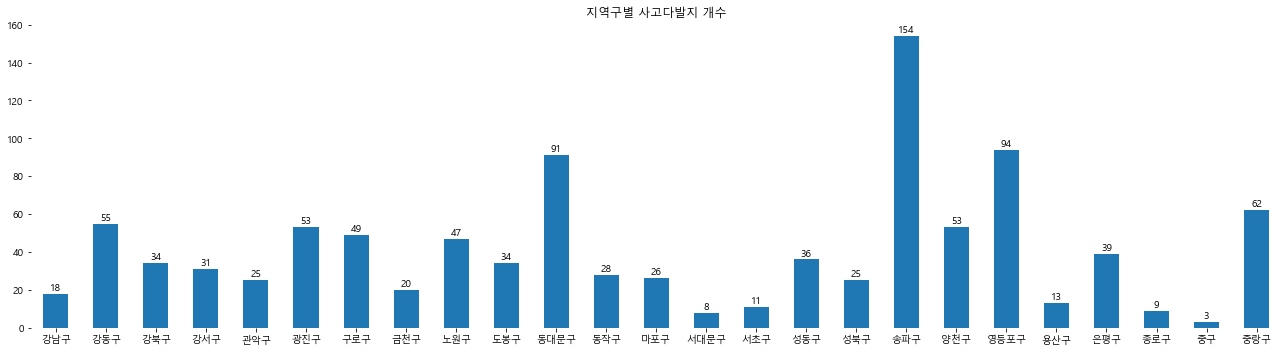

In [26]:
accident_seoul_gu = accident_seoul.groupby('지역구').size()

ax = accident_seoul_gu.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 사고다발지 개수")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height+2), ha='center')
plt.box(False)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [14]:
road = pd.read_csv('data/자전거도로현황.csv', encoding = 'CP949')
road.head()

,자치구,자전거전용도로_구간,자전거전용도로_길이,자전거보행자겸용도로_구간,자전거보행자겸용도로_길이,자전거전용차로_구간,자전거전용차로_길이,자전거우선도로_구간,자전거우선도로_길이
0,종로구,1,4.1,6,5.9,6,5.8,9,7.9
1,중구,0,0.0,2,2.4,1,0.7,10,12.3
2,용산구,3,1.6,8,10.4,0,0.0,5,10.1
3,성동구,3,0.6,10,9.2,2,5.5,7,5.3
4,광진구,1,0.4,17,25.1,1,0.5,3,3.8


In [15]:
road.shape

(25, 9)

In [18]:
road_bicycle = road.groupby(['자치구'])[['자전거전용도로_구간']].agg('sum')
road_bicycle

,자전거전용도로_구간
자치구,
강남구,3
강동구,5
강북구,0
강서구,9
관악구,1
광진구,1
구로구,2
금천구,2
노원구,1


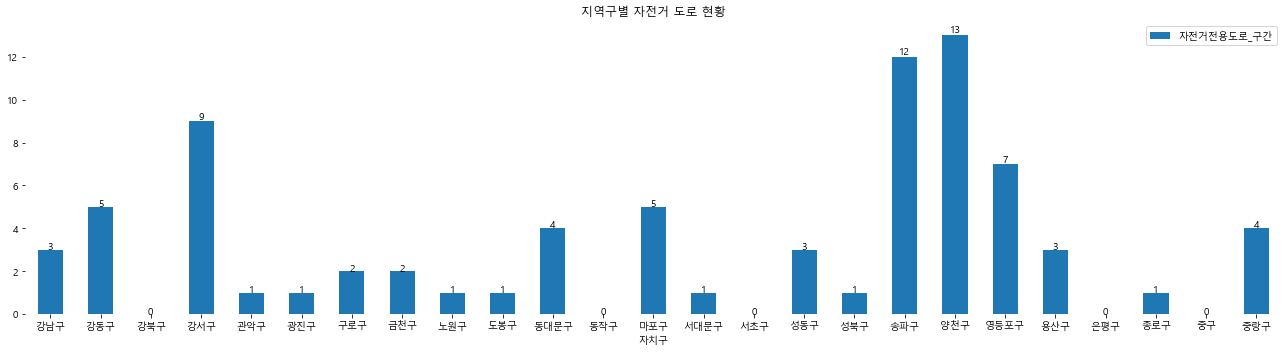

In [24]:
road_bicycle = road.groupby(['자치구'])[['자전거전용도로_구간']].agg('sum')
ax = road_bicycle.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 자전거 도로 현황")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center')
plt.box(False)
plt.tight_layout()
plt.show()

In [34]:
jeonyongdoro_length = road.groupby(['자치구'])[['자전거전용도로_길이']].agg('sum')
jeonyongdoro_length

,자전거전용도로_길이
자치구,
강남구,3.1
강동구,7.2
강북구,0.0
강서구,5.4
관악구,3.0
광진구,0.4
구로구,1.0
금천구,3.8
노원구,0.9


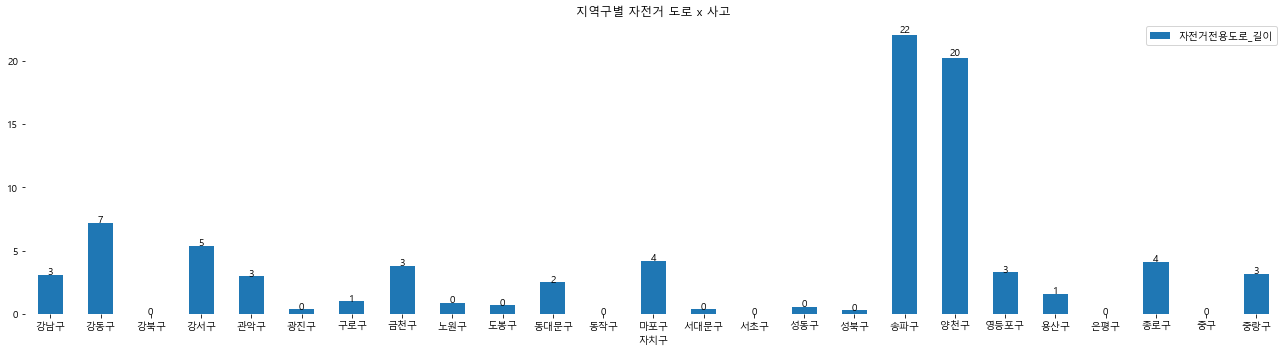

In [39]:
#자전거전용도로_길이 기준
jeonyongdoro_length = road.groupby(['자치구'])[['자전거전용도로_길이']].agg('sum')
ax = jeonyongdoro_length.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 자전거 도로 x 사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center')
plt.box(False)
plt.tight_layout()
plt.show()

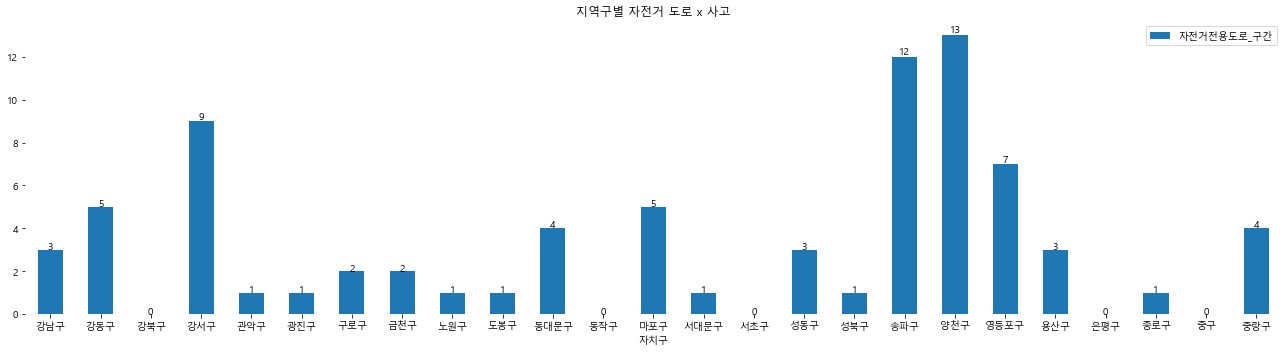

In [40]:
#자전거전용도로_구간기준
jeonyongdoro_gugan = road.groupby(['자치구'])[['자전거전용도로_구간']].agg('sum')
ax = jeonyongdoro_gugan.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 자전거 도로 x 사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center')
plt.box(False)
plt.tight_layout()
plt.show()

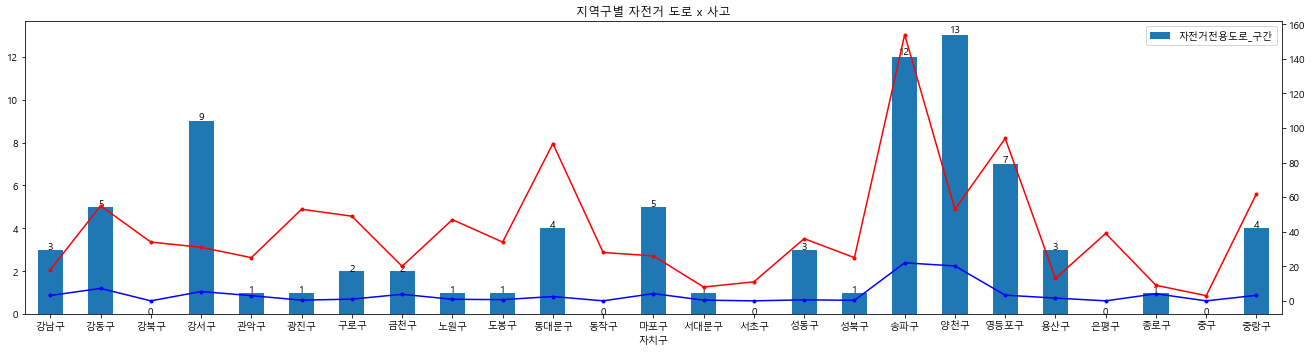

In [36]:
#자전거전용도로 구간, 길이 x 사고
jeonyongdoro_gugan = road.groupby(['자치구'])[['자전거전용도로_구간']].agg('sum')
ax = jeonyongdoro_gugan.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 자전거 도로 x 사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center')
plt.box(False)
plt.tight_layout()

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(accident_seoul_gu, 'r.-')
plt.plot(jeonyongdoro_length, 'b.-')
plt.show()

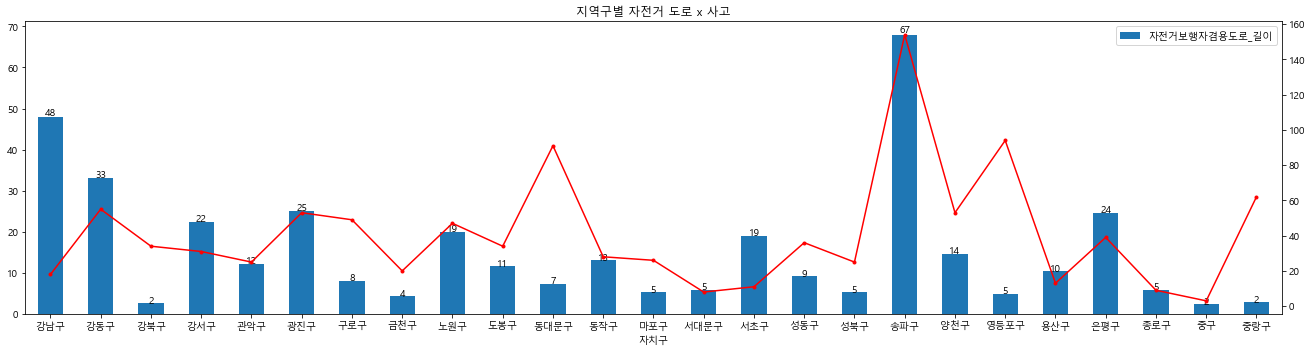

In [37]:
#자전거보행자겸용도로
bohangja_length = road.groupby(['자치구'])[['자전거보행자겸용도로_길이']].agg('sum')
ax = bohangja_length.plot(kind='bar', figsize=(18, 5), rot=0, title="지역구별 자전거 도로 x 사고")
for p in ax.patches: 
    left, bottom, width, height = p.get_bbox().bounds 
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center')
plt.box(False)
plt.tight_layout()

plt.twinx() # bar 그래프와 plot 그래프 합치기
plt.plot(accident_seoul_gu, 'r.-')
plt.show()

In [38]:
bohangja_length = road.groupby(['자치구'])[['자전거보행자겸용도로_길이']].agg('sum')
bohangja_length

,자전거보행자겸용도로_길이
자치구,
강남구,48.0
강동구,33.0
강북구,2.7
강서구,22.5
관악구,12.2
광진구,25.1
구로구,8.1
금천구,4.4
노원구,19.9
